In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [2]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
f_len = len(features)

In [3]:
#Это мой вариант считывания данных, ниже находится аналогичный предыдущим лабам
data = pd.read_excel('Dannye_1_1.xlsx', sheet_name='Данные для питона', index_col=0)
data.columns = features
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


In [4]:
# подставь свои значения!
# data = pd.read_excel("data.xlsx", sheet_name="sheet_name", index_col=0).loc[:, features]
# data.columns=features
# data.head()

In [5]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.466334,-0.499452,-1.195254,-1.507236,0.069739,0.207068,-0.626404,-0.266906,-0.251121,-0.373212
1,-0.785712,-0.855048,-1.298529,-1.448984,0.329812,-0.109225,-0.316544,0.106932,-0.394951,-0.521242
2,-1.034117,-0.979066,-0.317418,-0.827632,-1.342087,-0.202253,0.406464,-0.999628,-0.682612,-0.521242
3,-1.424468,-0.768632,-1.453441,-0.245114,-0.264641,0.225674,0.561394,-1.109287,-0.768011,-0.528291
4,0.598260,-0.709319,-1.943996,-0.497539,0.682768,-0.518546,-1.349412,-0.629528,-0.535785,-0.462500


In [6]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,-0.328434,0.717837,0.037041,-0.011260,0.088430,-0.042839,0.183548,-0.342709,-0.151315
x2,-0.328434,1.000000,-0.086028,0.697131,0.114888,-0.063335,0.212093,0.424869,0.691414,0.171459
x3,0.717837,-0.086028,1.000000,0.231706,0.137372,-0.111616,0.068966,0.168973,-0.133866,-0.096152
x4,0.037041,0.697131,0.231706,1.000000,0.163452,-0.152133,0.004120,0.544849,0.490472,0.177011
x5,-0.011260,0.114888,0.137372,0.163452,1.000000,-0.362135,-0.078402,0.163061,-0.096510,-0.034461
x6,0.088430,-0.063335,-0.111616,-0.152133,-0.362135,1.000000,0.072092,-0.039255,0.032160,-0.000521
x7,-0.042839,0.212093,0.068966,0.004120,-0.078402,0.072092,1.000000,0.033985,-0.001701,-0.269317
x8,0.183548,0.424869,0.168973,0.544849,0.163061,-0.039255,0.033985,1.000000,0.062749,0.005379
x9,-0.342709,0.691414,-0.133866,0.490472,-0.096510,0.032160,-0.001701,0.062749,1.000000,0.381331
x10,-0.151315,0.171459,-0.096152,0.177011,-0.034461,-0.000521,-0.269317,0.005379,0.381331,1.000000


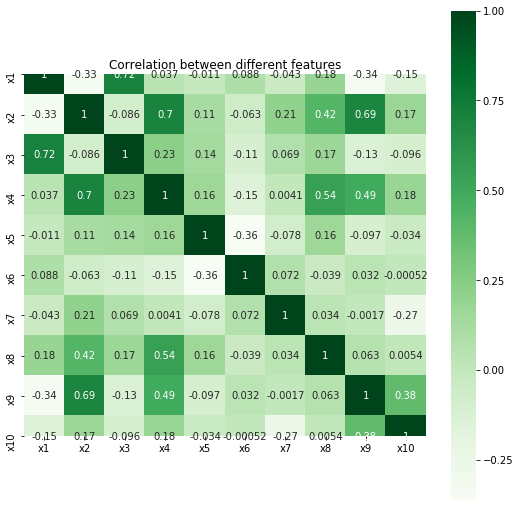

In [7]:
plt.figure(figsize=(9,9)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Greens')
plt.title('Correlation between different features')
plt.show()

In [8]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [9]:
eigenvalues_sorted

[2.688611046070121,
 2.0498301438433013,
 1.3734849458697787,
 1.2657324796752298,
 0.8318799146526283,
 0.6179517531062351,
 0.5674716251018439,
 0.25469184721437715,
 0.20132874434451262,
 0.14901750012198045]

In [10]:
import math

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R))

chi2_z = chi_2(scaled_data.shape[0], scaled_data.shape[1], correlation)
p_value =sts.chi2.sf(chi2_z, scaled_data.shape[1]* (scaled_data.shape[1]-1) / 2)
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости: ", p_value)
if p_value > 0.05:
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  310.9174381199846
Достигаемый уровень значимости:  1.9584181649143794e-41
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


In [11]:
#Доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], scaled_data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], scaled_data.shape[0])

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


,left_border,eig,right_border
0,2.064305,2.688611,3.854247
1,1.573852,2.049830,2.938525
2,1.054556,1.373485,1.968954
3,0.971825,1.265732,1.814486
4,0.638714,0.831880,1.192538
5,0.474461,0.617952,0.885862
6,0.435703,0.567472,0.813497
7,0.195551,0.254692,0.365112
8,0.154579,0.201329,0.288614
9,0.114415,0.149018,0.213623


In [12]:
#Проверка гипотезы о кратности собственных чисел

N = 85 # Число наблюдений
r = 2 # Число кратных корней
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 # Число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности собственных чисел принимается")
else:
    print(f"Гипотеза о кратности собственных чисел отвергается")

Достигаемый уровень значимости:  5.033176938251733e-63
Гипотеза о кратности собственных чисел отвергается


In [13]:
# оценка уровня информативности
pc = 3
lmbd = 0

'''for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len'''

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))


Оценка информативности для 1 главных компонент:
I(x) = 26.886%
Оценка информативности для 2 главных компонент:
I(x) = 47.384%
Оценка информативности для 3 главных компонент:
I(x) = 61.119%
Оценка информативности для 4 главных компонент:
I(x) = 73.777%


Значение pc выбирается так, чтобы информативность была выше 70% (насколько мы поняли)

In [14]:
# Критерий Кайзера
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Критерий Кайзера:  4
Гипотеза о достаточности 3 главных компонент принимается


In [15]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
df

,eig,number,variance_share
0,2.688611,1,0.27
1,2.049830,2,0.20
2,1.373485,3,0.14
3,1.265732,4,0.13
4,0.831880,5,0.08
5,0.617952,6,0.06
6,0.567472,7,0.06
7,0.254692,8,0.03
8,0.201329,9,0.02
9,0.149018,10,0.01


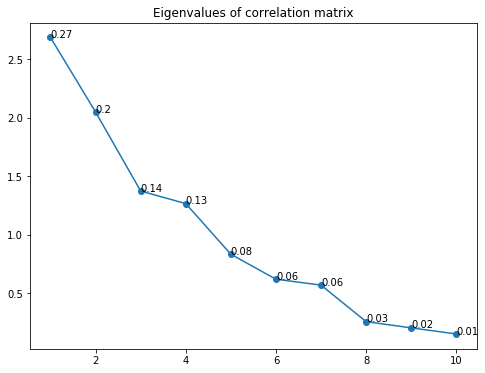

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [17]:
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share']])], axis=1)
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share']
result

,eig,number,variance_share,cum_eig,cum_variance_share
0,2.688611,1,0.27,2.688611,0.27
1,2.049830,2,0.20,4.738441,0.47
2,1.373485,3,0.14,6.111926,0.61
3,1.265732,4,0.13,7.377659,0.74
4,0.831880,5,0.08,8.209539,0.82
5,0.617952,6,0.06,8.827490,0.88
6,0.567472,7,0.06,9.394962,0.94
7,0.254692,8,0.03,9.649654,0.97
8,0.201329,9,0.02,9.850982,0.99
9,0.149018,10,0.01,10.000000,1.00


In [18]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков 
vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(f_len)], index=features)
vector_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
x1,-0.212628,0.545498,0.200619,0.284720,0.223796,-0.673028,-0.162257,0.075689,-0.024009,0.014955
x2,0.558919,-0.003396,0.120809,-0.169757,0.785865,0.071647,-0.076263,0.019954,-0.121408,0.022678
x3,-0.056032,0.584392,0.103511,0.173641,-0.029841,0.649815,-0.049639,0.414668,-0.112123,0.065925
x4,0.496828,0.273305,0.047043,0.058708,-0.275247,-0.166466,0.727645,-0.036620,-0.126686,-0.149923
x5,0.098075,0.243347,-0.574219,-0.239664,-0.077903,-0.106774,-0.056369,-0.097107,-0.211455,0.684987
x6,-0.090737,-0.155934,0.616047,0.215388,-0.031627,0.116941,0.124895,-0.368261,-0.273766,0.548368
x7,0.034662,0.044706,0.419329,-0.612081,-0.154946,-0.137299,0.041460,0.376844,0.433406,0.268123
x8,0.302964,0.362333,0.093628,-0.050385,-0.208345,0.139309,-0.377427,-0.625921,0.395299,-0.110986
x9,0.477102,-0.196452,0.128385,0.164291,-0.419466,-0.169100,-0.515615,0.323135,-0.339712,-0.008968
x10,0.232281,-0.175501,-0.147994,0.590352,0.072408,0.001204,0.084379,0.193211,0.613919,0.343855


In [19]:
# построение главных компонент
pc = 3

u = pd.DataFrame(
    data=np.array([couple_lst[i][1] for i in range(f_len)]).T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features
)
u

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
x1,-0.212628,0.545498,0.200619,0.284720,0.223796,-0.673028,-0.162257,0.075689,-0.024009,0.014955
x2,0.558919,-0.003396,0.120809,-0.169757,0.785865,0.071647,-0.076263,0.019954,-0.121408,0.022678
x3,-0.056032,0.584392,0.103511,0.173641,-0.029841,0.649815,-0.049639,0.414668,-0.112123,0.065925
x4,0.496828,0.273305,0.047043,0.058708,-0.275247,-0.166466,0.727645,-0.036620,-0.126686,-0.149923
x5,0.098075,0.243347,-0.574219,-0.239664,-0.077903,-0.106774,-0.056369,-0.097107,-0.211455,0.684987
x6,-0.090737,-0.155934,0.616047,0.215388,-0.031627,0.116941,0.124895,-0.368261,-0.273766,0.548368
x7,0.034662,0.044706,0.419329,-0.612081,-0.154946,-0.137299,0.041460,0.376844,0.433406,0.268123
x8,0.302964,0.362333,0.093628,-0.050385,-0.208345,0.139309,-0.377427,-0.625921,0.395299,-0.110986
x9,0.477102,-0.196452,0.128385,0.164291,-0.419466,-0.169100,-0.515615,0.323135,-0.339712,-0.008968
x10,0.232281,-0.175501,-0.147994,0.590352,0.072408,0.001204,0.084379,0.193211,0.613919,0.343855


In [20]:
# матрица нагрузок
A = np.diag(np.sqrt(eigenvalues_sorted)) @ u
A.index = features
A

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
x1,-0.348646,0.894452,0.328954,0.466855,0.366957,-1.103564,-0.266053,0.124108,-0.039367,0.024521
x2,0.800217,-0.004863,0.172965,-0.243044,1.125141,0.102578,-0.109187,0.028568,-0.173823,0.032468
x3,-0.065667,0.684882,0.121311,0.203500,-0.034972,0.761555,-0.058175,0.485974,-0.131403,0.077261
x4,0.558955,0.307481,0.052926,0.066049,-0.309666,-0.187282,0.818636,-0.041199,-0.142527,-0.168671
x5,0.089452,0.221951,-0.523731,-0.218592,-0.071053,-0.097386,-0.051413,-0.088569,-0.192863,0.624759
x6,-0.071328,-0.122580,0.484274,0.169316,-0.024862,0.091927,0.098180,-0.289489,-0.215207,0.431072
x7,0.026111,0.033677,0.315884,-0.461085,-0.116722,-0.103428,0.031232,0.283880,0.326487,0.201979
x8,0.152897,0.182859,0.047251,-0.025428,-0.105146,0.070305,-0.190476,-0.315884,0.199496,-0.056011
x9,0.214074,-0.088148,0.057606,0.073717,-0.188213,-0.075874,-0.231355,0.144990,-0.152427,-0.004024
x10,0.089667,-0.067748,-0.057130,0.227892,0.027952,0.000465,0.032573,0.074585,0.236990,0.132738


In [21]:
# Матрица индивидуальных значений главных компонент
F = (np.linalg.inv(A.T @ A) @ A.T @ scaled_data.T).T
F.columns = ['Factor_' + str(i + 1) for i in range(f_len)]
#F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F[:18]

,Factor_1,Factor_2,Factor_3
0,-1.440007,-1.087761,-0.476403
1,-1.445602,-0.681322,-0.706340
2,-2.340253,-1.176731,0.459984
3,-1.983213,-1.558414,0.055190
4,-1.635995,-0.691699,-1.859320
5,-2.718950,-1.805508,0.787199
6,-2.490671,-2.623551,-1.424978
7,-2.371789,-2.670339,-2.714805
8,-2.278884,-2.905221,-3.182679
9,-3.471906,-3.966191,0.821536


In [22]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel('classes.xlsx')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old
0,-1.440007,-1.087761,-0.476403,6,3
1,-1.445602,-0.681322,-0.706340,4,4
2,-2.340253,-1.176731,0.459984,6,3
3,-1.983213,-1.558414,0.055190,6,4
4,-1.635995,-0.691699,-1.859320,5,5
...,...,...,...,...,...
80,4.886869,-3.435112,-0.272345,1,1
81,5.284296,-2.881490,2.766924,6,3
82,4.659102,-2.986174,-1.762333,7,6
83,5.472935,-3.056709,-3.822174,7,7


In [23]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

In [24]:
F.iloc[:, :pc]

,Factor_1,Factor_2,Factor_3
0,-1.440007,-1.087761,-0.476403
1,-1.445602,-0.681322,-0.706340
2,-2.340253,-1.176731,0.459984
3,-1.983213,-1.558414,0.055190
4,-1.635995,-0.691699,-1.859320
...,...,...,...
80,4.886869,-3.435112,-0.272345
81,5.284296,-2.881490,2.766924
82,4.659102,-2.986174,-1.762333
83,5.472935,-3.056709,-3.822174


Text(0.5, 1.0, 'ward method')

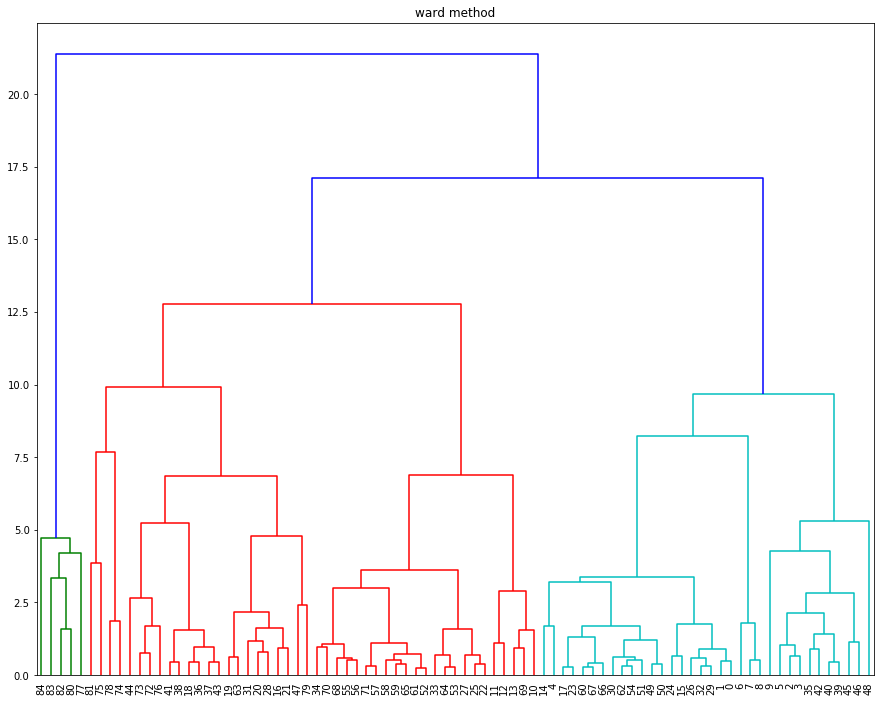

In [25]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [26]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new
0,-1.440007,-1.087761,-0.476403,6,3,5,6
1,-1.445602,-0.681322,-0.706340,4,4,5,6
2,-2.340253,-1.176731,0.459984,6,3,2,1
3,-1.983213,-1.558414,0.055190,6,4,2,1
4,-1.635995,-0.691699,-1.859320,5,5,5,5
...,...,...,...,...,...,...,...
80,4.886869,-3.435112,-0.272345,1,1,3,2
81,5.284296,-2.881490,2.766924,6,3,0,2
82,4.659102,-2.986174,-1.762333,7,6,3,2
83,5.472935,-3.056709,-3.822174,7,7,3,2


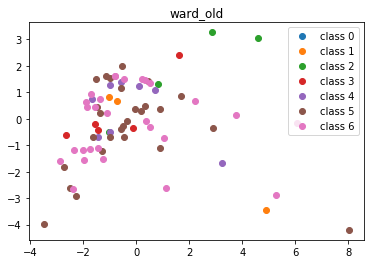

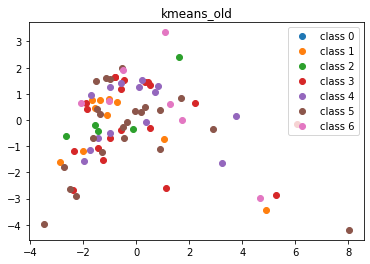

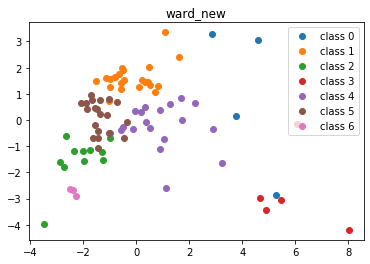

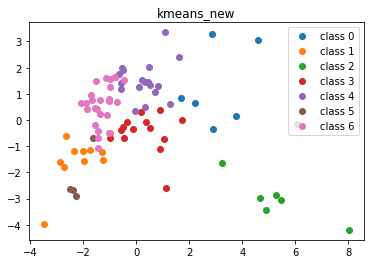

In [27]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()


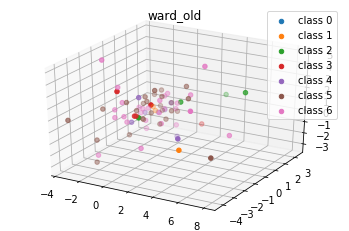

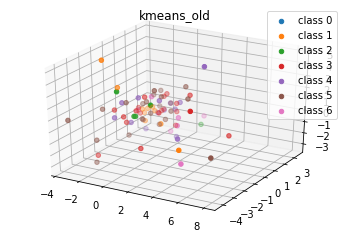

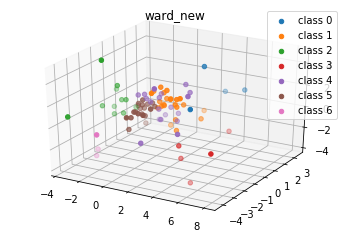

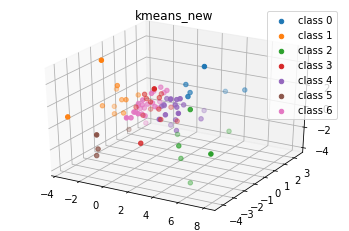

In [105]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [106]:
# выгрузка в файл
F.to_excel('Lab3_python.xlsx')